In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = y.astype(int)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

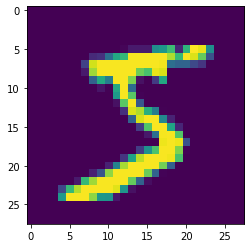

In [6]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [7]:
print(y_train[:30])
y_train_5 = (y_train == 5) #true when a y train value is 5
y_test_5 = (y_test == 5) #similar 
print(y_train_5[:30]) #check the before and after y values for the first 20 rows

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
[ True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False]


In [8]:
y_train_dict = {}
for i in y_train:
    y_train_dict['y_train_'f'{np.unique(i)}'] = np.array(y_train == i)

# print(np.unique(y_train_dict.keys()))
print(y_train_dict)
print(y_train_dict.keys())

{'y_train_[5]': array([ True, False, False, ...,  True, False, False]), 'y_train_[0]': array([False,  True, False, ..., False, False, False]), 'y_train_[4]': array([False, False,  True, ..., False, False, False]), 'y_train_[1]': array([False, False, False, ..., False, False, False]), 'y_train_[9]': array([False, False, False, ..., False, False, False]), 'y_train_[2]': array([False, False, False, ..., False, False, False]), 'y_train_[3]': array([False, False, False, ..., False, False, False]), 'y_train_[6]': array([False, False, False, ..., False,  True, False]), 'y_train_[7]': array([False, False, False, ..., False, False, False]), 'y_train_[8]': array([False, False, False, ..., False, False,  True])}
dict_keys(['y_train_[5]', 'y_train_[0]', 'y_train_[4]', 'y_train_[1]', 'y_train_[9]', 'y_train_[2]', 'y_train_[3]', 'y_train_[6]', 'y_train_[7]', 'y_train_[8]'])


In [9]:
y_test_dict = {}
for i in y_test:
    y_test_dict['y_test_'f'{np.unique(i)}'] = np.array(y_test == i)

# print(np.unique(y_train_dict.keys()))
print(y_test_dict)
print(y_test_dict.keys())

{'y_test_[7]': array([ True, False, False, ..., False, False, False]), 'y_test_[2]': array([False,  True, False, ..., False, False, False]), 'y_test_[1]': array([False, False,  True, ..., False, False, False]), 'y_test_[0]': array([False, False, False, ..., False, False, False]), 'y_test_[4]': array([False, False, False, ...,  True, False, False]), 'y_test_[9]': array([False, False, False, ..., False, False, False]), 'y_test_[5]': array([False, False, False, ..., False,  True, False]), 'y_test_[6]': array([False, False, False, ..., False, False,  True]), 'y_test_[3]': array([False, False, False, ..., False, False, False]), 'y_test_[8]': array([False, False, False, ..., False, False, False])}
dict_keys(['y_test_[7]', 'y_test_[2]', 'y_test_[1]', 'y_test_[0]', 'y_test_[4]', 'y_test_[9]', 'y_test_[5]', 'y_test_[6]', 'y_test_[3]', 'y_test_[8]'])


In [10]:
from typing import OrderedDict


dict1 = OrderedDict(sorted(y_train_dict.items()))
dict2 = OrderedDict(sorted(y_test_dict.items()))

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

df = []
for i in range(0,10):
    # print('y_train_'f'{[i]}' ,y_train_dict['y_train_'f'{[i]}'])
    sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    sgd_clf.fit(X_train, y_train_dict['y_train_'f'{[i]}'])
    # sgd_clf.predict(X_test[0:25])
    # print(y_train_dict)
    # y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_dict['y_train_'f'{[i]}'], cv=5)
    y_test_pred = cross_val_predict(sgd_clf, X_test, dict2['y_test_'f'{[i]}'], cv=5)
    print('Number'f'{i}')
    print(y_test_pred)
    print(metrics.confusion_matrix(dict2['y_test_'f'{[i]}'], y_test_pred))
    print(cross_val_score(sgd_clf, X_test, dict2['y_test_'f'{[i]}'], cv=5, scoring="accuracy"))
    number = 'Number'f'{i}'
    prediction = y_test_pred
    confusion_matrix = metrics.confusion_matrix(dict2['y_test_'f'{[i]}'], y_test_pred)
    accuracy = cross_val_score(sgd_clf, X_test, dict2['y_test_'f'{[i]}'], cv=5, scoring="accuracy")
    df.append([number, prediction, confusion_matrix, accuracy])

df_all_test = pd.DataFrame(df)

Number0
[False False False ... False False False]
[[8912  108]
 [  56  924]]
[0.9845 0.985  0.983  0.9905 0.975 ]
Number1
[False False  True ... False False False]
[[8816   49]
 [  75 1060]]
[0.99   0.9855 0.991  0.986  0.9855]
Number2
[False  True False ... False False False]
[[8663  305]
 [ 134  898]]
[0.947  0.945  0.9465 0.97   0.972 ]
Number3
[False False False ... False False False]
[[8731  259]
 [ 188  822]]
[0.9635 0.944  0.9515 0.9585 0.959 ]
Number4
[False False False ...  True False False]
[[8864  154]
 [ 124  858]]
[0.969  0.9715 0.965  0.9755 0.98  ]
Number5
[False False False ... False  True False]
[[8919  189]
 [ 197  695]]
[0.9575 0.95   0.9645 0.963  0.972 ]
Number6
[False False False ... False False  True]
[[8915  127]
 [  86  872]]
[0.971  0.9755 0.981  0.9855 0.9805]
Number7
[ True False False ... False False False]
[[8846  126]
 [ 145  883]]
[0.961  0.9635 0.977  0.9845 0.9785]
Number8
[False False False ... False False False]
[[8421  605]
 [ 323  651]]
[0.872  0.9

In [13]:
test_df = df_all_test.rename(columns= {0: 'Num', 1: 'Prediction', 2: 'Confusion Matrix', 3: 'CV Accuracy'})

In [14]:
test_df

,Num,Prediction,Confusion Matrix,CV Accuracy
0,Number0,"[False, False, False, True, False, False, Fals...","[[8912, 108], [56, 924]]","[0.9845, 0.985, 0.983, 0.9905, 0.975]"
1,Number1,"[False, False, True, False, False, True, False...","[[8816, 49], [75, 1060]]","[0.99, 0.9855, 0.991, 0.986, 0.9855]"
2,Number2,"[False, True, False, False, False, False, Fals...","[[8663, 305], [134, 898]]","[0.947, 0.945, 0.9465, 0.97, 0.972]"
3,Number3,"[False, False, False, False, False, False, Fal...","[[8731, 259], [188, 822]]","[0.9635, 0.944, 0.9515, 0.9585, 0.959]"
4,Number4,"[False, False, False, False, True, False, Fals...","[[8864, 154], [124, 858]]","[0.969, 0.9715, 0.965, 0.9755, 0.98]"
5,Number5,"[False, False, False, False, False, False, Fal...","[[8919, 189], [197, 695]]","[0.9575, 0.95, 0.9645, 0.963, 0.972]"
6,Number6,"[False, False, False, False, False, False, Fal...","[[8915, 127], [86, 872]]","[0.971, 0.9755, 0.981, 0.9855, 0.9805]"
7,Number7,"[True, False, False, False, False, False, Fals...","[[8846, 126], [145, 883]]","[0.961, 0.9635, 0.977, 0.9845, 0.9785]"
8,Number8,"[False, False, False, False, False, False, Tru...","[[8421, 605], [323, 651]]","[0.872, 0.9255, 0.9185, 0.882, 0.938]"
9,Number9,"[False, False, False, False, False, False, Fal...","[[8487, 504], [216, 793]]","[0.895, 0.927, 0.942, 0.9415, 0.9345]"


In [ ]:
import os
os.chdir('/Users/alisdghnia/Desktop/')
test_df.to_csv('HW1 Q3 Test Dataset.csv')

In [19]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_dict = {}
for i in range(1,6):
    sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
    sgd_clf.fit(X_train, y_train_5)
    accuracy_dict[i] = accuracy_score(y_test_5, sgd_clf.predict(X_test))

accuracy_dict

{1: 0.9679, 2: 0.9318, 3: 0.9418, 4: 0.9661, 5: 0.9678}

In [42]:
list = []
for item in accuracy_dict.items():
    list.append(item[1])

list

[0.9679, 0.9318, 0.9418, 0.9661, 0.9678]

In [43]:
avg_accuracy_random_resampling = np.mean(list)

In [44]:
avg_accuracy_random_resampling

0.9550799999999999

In [45]:
avg_accuracy_cv = np.mean(test_df['CV Accuracy'][5])

In [46]:
avg_accuracy_cv

0.9614

Question 1:

    test_df table

    Number 8 confusion matrix is showing to have been the hardest number to predict!!!

Question 2:

    avg_accuracy_cv > avg_accuracy_random_resampling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(int))

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)
big_confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
big_confusion_matrix

KeyboardInterrupt: 

Question 3:

    Should get similar result!